# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This Dataset contains 110,527 rows of medical appointments made by patients in Brazil and whether they show up for. It 14 associated variables. The most important one if the patient had shown-up or not.

<h3>The Variables</h3>
<ul>
    <li style="font-size:15px"><b style="font-size:16px">PatientId:</b> Identification Number of the Patient</li>
    <li style="font-size:15px"><b style="font-size:16px">AppointmentID:</b> Identification Number of the Appointment</li>
    <li style="font-size:15px"><b style="font-size:16px">Gender:</b> Gender of the Patient</li>
    <li style="font-size:15px"><b style="font-size:16px">ScheduledDay:</b> The day the Patient made the Appointment on</li>
    <li style="font-size:15px"><b style="font-size:16px">AppointmentDay:</b> The day of the Appointment</li>
    <li style="font-size:15px"><b style="font-size:16px">Age:</b> Age of the Patient</li>
    <li style="font-size:15px"><b style="font-size:16px">Neighbourhood:</b> Where the Patient lives</li>
    <li style="font-size:15px"><b style="font-size:16px">Scholarship:</b> Whether or not the patient is a recipient of the <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Familia Scholarship Program</a></li>
    <li style="font-size:15px"><b style="font-size:16px">Hypertension:</b> Does the Patient have a high blood pressure?</li>
    <li style="font-size:15px"><b style="font-size:16px">Diabetes:</b> Does the Patient have Diabetes?</li>
    <li style="font-size:15px"><b style="font-size:16px">Alcoholism:</b> Does the Patient have Alcoholism?</li>
    <li style="font-size:15px"><b style="font-size:16px">Handcap:</b> is the Patient handicapped?</li>
    <li style="font-size:15px"><b style="font-size:16px">SMS_received:</b> How many messages the patient had recieved reminding him of the Appointment</li>
    <li style="font-size:15px"><b style="font-size:16px">No-show:</b> Did the Patient show up for the appointment or not? (<b>Yes:</b> Didn't show up <b>No:</b> Did show up) </li>
</ul>

#### Later in the Data Wrangling section, I will edit the names and the types of those columns to make them more readable.

### Question(s) for Analysis
<ol style="font-size:17px">
    <li>Does the Gender of the Patient affect showing up for the Appointment?</li>
    <li>Do younger patients show up for the Appointment more than their older counterparts?</li>
    <li>What is the Day of the Week with the highest percentage of patients showing up?</li>
    <li>If the Patient is a reciepent of the Scholarship Program, Does that mean they will show up for the Appointment more than the others?</li>
    <li>Does receiving an SMS mean the Patient will show up for the Appointment?</li>
    <li>Do patients with Diabetes and/or Hypertension show up less for their Appointments?</li>
    <li>Does Alcoholism affect showing up for Appointments or not?</li>
    <li>Do handicapped Patients show up less for their Appointments?</li>
</ol>

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
% matplotlib inline

In [389]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [390]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [391]:
df.shape

(110527, 14)

In [392]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [394]:
df.duplicated().sum()

0

In [395]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<p style="font-size:15px">There are 110527 entries (rows) in the Dataset with 14 associated variables (columns). It also has no duplicated entries nor missing values. So the data itself is fine, but the names and datatypes of the columns needs to be tweaked to make the Dataset more readible </p>


### Data Cleaning

In [396]:
# Remove unimportant variables
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<p style="font-size:15px">First I dropped the <b>PatientID</b> and <b>AppointmentID</b> columns because they are irrelevant for our project</p>

In [397]:
# Rename Some the columns for readability
df.rename(lambda x:x.lower().replace('-', '_').replace('dday', 'd_day').replace('entd', 'ent_d').replace('dc', 'dic').replace('ipe', 'ype').replace('led','ling'), axis=1, inplace=True)
# Rename the last column for it be less confusing
df.rename(columns={'no_show':'shown_up'}, inplace=True)
df.head(1)

,gender,scheduling_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<p style="font-size:15px">Then I renamed every column to make them easy to read, understand and use in code.</p>
<p style="font-size:15px">Also I changed the <b>no_show</b> column to <b>shown_up</b>, such that it indicates if the patient had shown up or not</p>

In [398]:
# Change the Datatypes of the dates variable from string to datetime to be able to do arithmetic operations on them
df['scheduling_day'] = pd.to_datetime(df['scheduling_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
df.head(1)

,gender,scheduling_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<p style="font-size:15px">Then I converted the <b>scheduling_day</b> and <b>appointment_day</b> columns' datatypes to datetime and used the date only</p>
<p style="font-size:15px"><b>Important:</b> the data in <b>appointment_day</b> has no time of day data (all of them are 00:00:00), but the <b>scheduling_day</b> does have them. Some of the Entries has the scheduling and the appointment on the same day, which means that some of the appointment days will be behind the scheduling by some hours mistakenly. That is why I used the date only, so that unavailable time of day data won't cause erroneous calculations.</p>

In [399]:
# Remove any entries where the appointment day is before the scheduling day
df.drop(df[df['scheduling_day'] > df['appointment_day']].index, axis=0, inplace=True)

<p style="font-size:15px"> Then I dropped any entry where the appointment day is behind the scheduling day by more than 1 day.</p>

In [400]:
df.drop(df[df['handicap'] > 1].index, axis=0, inplace=True)
df.drop(df[df['age'] < 0].index, axis=0, inplace=True)

<p style="font-size:15px">I have also dropped entries with a handicap value higher than 1 and entries with ages less than 0</p>

In [401]:
# Change the datatype of the "shown_up" column such that 1 indicates the patient had shown up for the appointment
df['shown_up'] = df['shown_up'].apply(lambda x: 1 if x=='No' else 0)
df.head(1)

,gender,scheduling_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


<p style="font-size:15px">Then I converted the <b>shown_up</b> data from string to Int. I've also flipped it from indicating not showing up to showing up.</p>

In [402]:
# Add a new columnn that indicates the time between setting up the appointment and day of the appointment
df.insert(3, 'waiting_time', df['appointment_day'] - df['scheduling_day'])
df.head(1)

,gender,scheduling_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown_up
0,F,2016-04-29,2016-04-29,0 days,62,JARDIM DA PENHA,0,1,0,0,0,0,1


<p style="font-size:15px">Finally, I inserted a new column, <b>waiting_time</b>, that indicates the time difference in days between the day of scheduling and the appointment day</p>

In [403]:
df.describe()

,waiting_time,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown_up
count,110322,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,10 days 04:30:02.055800,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,0.798109
std,15 days 06:11:27.339088,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,0.401413
min,0 days 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:00:00,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4 days 00:00:00,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15 days 00:00:00,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179 days 00:00:00,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [404]:
df.duplicated().sum()

8062

<a id='eda'></a>
## Exploratory Data Analysis


<p style="font-size:15px">Before we start answering the posed research Questions, let's first investigate some general statistics about the dataset.</p>

### Gender Distribution

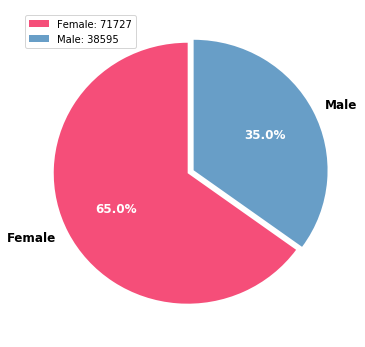

In [405]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%.1f%%', colors=['#f54e79','#689ec7'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Female: 71727', 'Male: 38595']);

<p style="font-size:15px">Here we see that the number of female patients in the dataset is about 1.8 times the number of male patients, so we need to take that into consideration when we compare the data by gender.</p>

### Showing-up Distribution

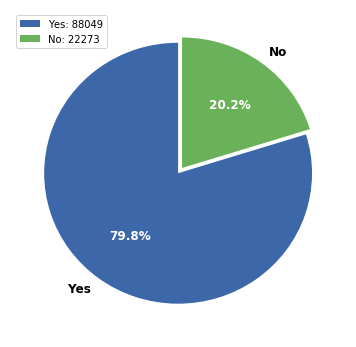

In [406]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df['shown_up'].value_counts(), labels=['Yes', 'No'], autopct='%.1f%%', colors=['#3c67a9', '#69b259'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 88049', 'No: 22273']);

### Correlation Matrix

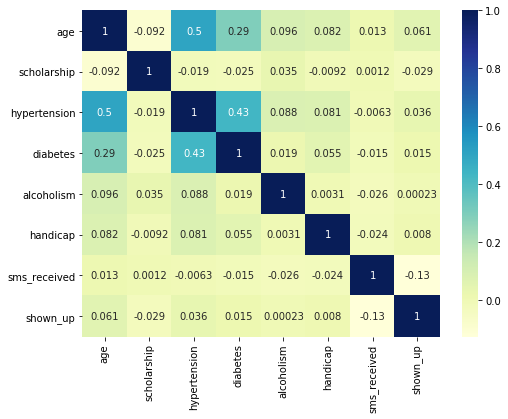

In [407]:
plt.figure(figsize=[8,6])
sns.heatmap(data=df.corr(), annot=True, cmap='YlGnBu');

<p style="font-size:15px">From the correlation Matrix, we can deduce the following:</p>
<ul style="font-size:15px">
    <li>There is a high positive correlation coefficient (<b>0.5</b>) between <b>age</b> and <b>hypertension</b>, which means, the older the Patient the higher the possibility of them having hypertension.</li>
    <li>There is a moderately high positive correlation coefficient (<b>0.29</b>) between <b>age</b> and <b>diabetes</b>, which means, the older the Patient the higher the possibility of them having diabetes.</li>
    <li>There is a high positive correlation coefficient (<b>0.43</b>) between <b>diabetes</b> and <b>hypertension</b>, combining this with age and diabetes correlation coefficient, it means there is a high possiblity that the elderly have both diabetes and hypertension.</li>
    <li>There is a negative correlation coefficient (<b>-0.13</b>) between <b>shown_up</b> and <b>sms_received</b>, which means, patients who have received an SMS have a lower probability of showing up for the Appointment.</li>
    <li>There is a negative correlation coefficient (<b>-0.029</b>) between <b>shown_up</b> and <b>scholarship</b>, which means, patients with no scholarship have a higher probability of showing up for the Appointment.</li>
    <li>There is a very small positive correlation coefficient (<b>0.00023</b>) between <b>shown_up</b> and <b>alcoholism</b>, which means, alcoholism doesn't affect whether the Patients shows up or not for the Appointment.</li>
</ul>

<p style="font-size:16px">Now that we have a general view of the relationship between the dataset variables, let's answer the research quesitons.</p>

### Does the Gender of the Patient affect showing up for the Appointment?

<p style="font-size:16px">Let's investigate if gender affects the probability of showing up for the Appointment or not.</p>

In [408]:
gen=df.groupby(['gender', 'shown_up'])['age'].count()
gen

gender  shown_up
F       0           14565
        1           57162
M       0            7708
        1           30887
Name: age, dtype: int64

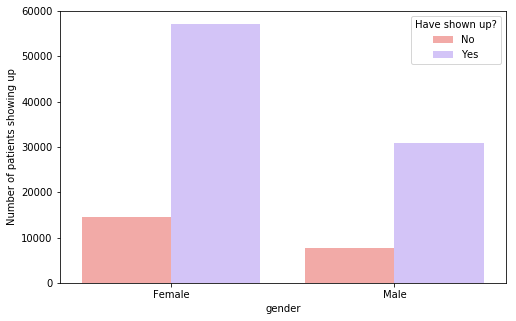

In [409]:
plt.figure(figsize=[8,5])
sns.countplot(x='gender', hue='shown_up', data=df, palette=sns.color_palette('pastel')[2:4]).set(xticklabels=['Female', 'Male'], ylabel='Number of patients showing up')
plt.legend(['No', 'Yes'], title='Have shown up?');

<p style="font-size:16px">Judging by the Plot above alone is misleading, because it will indicate that female patients show up more than males by a long shot, but as we know, female patients are 1.8 times more than male patients, so we need to take that into consideration and normalize the data.</p>

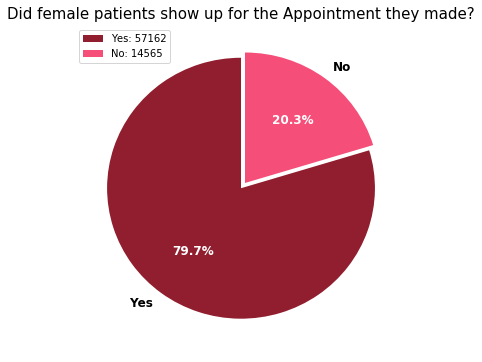

In [410]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(gen['F'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 57162', 'No: 14565']);
plt.title('Did female patients show up for the Appointment they made?', fontdict={'fontsize':15});

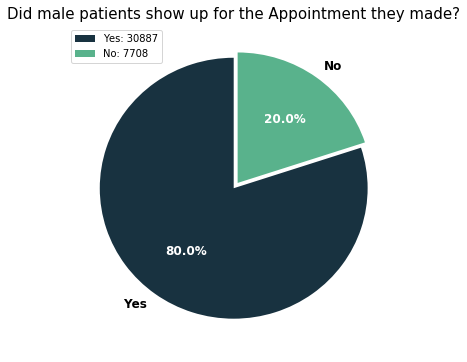

In [411]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(gen['M'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 30887', 'No: 7708']);
plt.title('Did male patients show up for the Appointment they made?', fontdict={'fontsize':15});

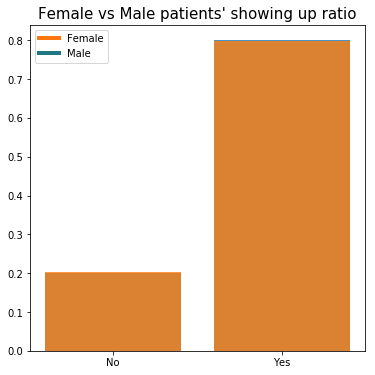

In [412]:
plt.figure(figsize=[6,6])
plt.bar(height=gen['M'][::-1]/df['gender'].value_counts()['M'], x=['Yes', 'No'], alpha=0.8);
plt.bar(height=gen['F'][::-1]/df['gender'].value_counts()['F'], x=['Yes', 'No'], alpha=0.8);
lines = [Line2D([0], [0], color="#ff760e", lw=4), Line2D([0], [0], color='#1f7784', lw=4)]
plt.legend(lines, ['Female', 'Male']);
plt.title("Female vs Male patients' showing up ratio", fontdict={'fontsize':15});

<p style="font-size:16px">From the plots above, we can see that the Ratio between patients who showed up vs. the ones who didn't is almost the same for both males and females.</p>
<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">We conclude that: Gender <i><b>does not</b></i> affect the probability of the Patients showing up for the appointments.</p>


### Do younger patients show up for the Appointment more than their older counterparts?

<p style="font-size:16px">Let's look at some general statistics about the Ages of the patients.</p>

In [413]:
df['age'].describe()

count    110322.00000
mean         37.07092
std          23.09791
min           0.00000
25%          18.00000
50%          37.00000
75%          55.00000
max         115.00000
Name: age, dtype: float64

Text(0.5,1,'Box plot of the')

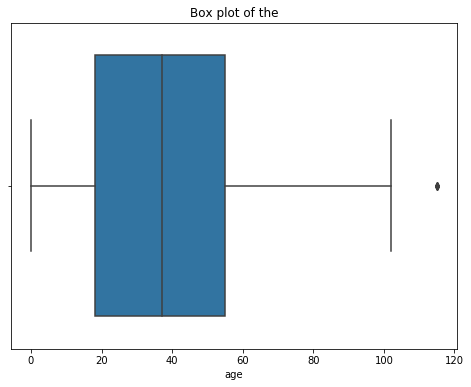

In [414]:
plt.figure(figsize=[8,6])
sns.boxplot(x=df['age']);
plt.title("Box plot of the")

<p style="font-size:16px">Here we see that the Minimum age is <b>0</b>, babies who haven't turned one year old, and the Maximum age is <b>115</b>, which is very old, but possible (<i>The oldest person on earth was 122 year old!</i>)</p>

<p style="font-size:16px">Now, let's answer this question by drawing a count plot of each age.</p>

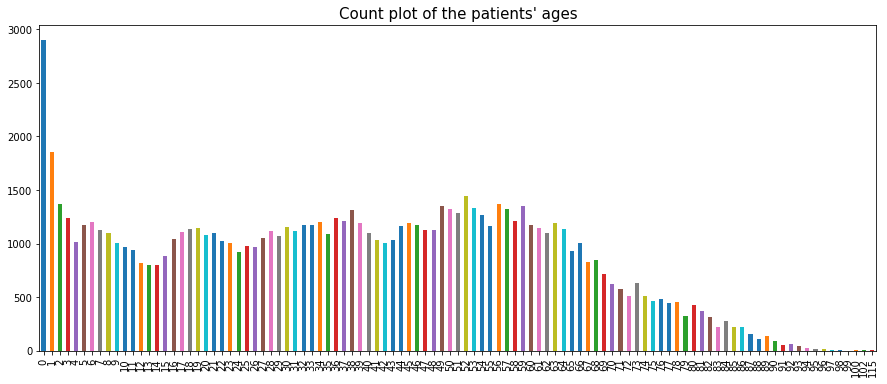

In [415]:
plt.figure(figsize=[15,6])
df.query('shown_up==1')['age'].value_counts().sort_index().plot.bar();
plt.title("Count plot of the patients' ages", fontdict={'fontsize':15});

<p style="font-size:16px">Okay, plotting the count of each age was not useful for an answer, because age is quantitative and there are <b>103</b> unique ages in this dataset. So a better way to answer the Question is to split the ages of Patients into 4 categorical age groups, Age Classes, and see which age class has the highest Percentage of showing up to the Appointments.</p>


In [416]:
groups = ['Child', 'Adolescent', 'Adult', 'Senior Adult']
df['age_class'] = pd.cut(df['age'], [0,12,18,59,115], labels=groups, include_lowest=True, right=True)

Age Class | Range
:---: | :---:
**Child** | 0-12
**Adolescence** | 13-18
**Adult** | 19-59
**Senior Adult** | 60 and above

<p style="font-size:16px">I've used this <a href='https://ieeexplore.ieee.org/document/6416855'>paper</a> to determine the range of each age class.</p>
<p style="font-size:16px">Now, let's take a look at the ratio of each age group.</p>

In [417]:
df['age_class'].value_counts()

Adult           60404
Senior Adult    21100
Child           21013
Adolescent       7805
Name: age_class, dtype: int64

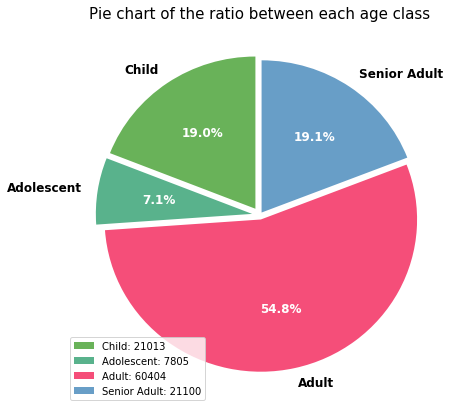

In [418]:
plt.figure(figsize=[7,7])
_, _, at = plt.pie(df['age_class'].value_counts().sort_index(), colors=['#69b259', '#59b28c', '#f54e79', '#689ec7'], labels=groups, autopct='%.1f%%', startangle=90, explode=[0.05,0.05, 0.03, 0.02], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Child: 21013', 'Adolescent: 7805', 'Adult: 60404', 'Senior Adult: 21100'], loc=3, frameon=True, fancybox=True);
plt.title('Pie chart of the ratio between each age class', fontdict={'fontsize':15});

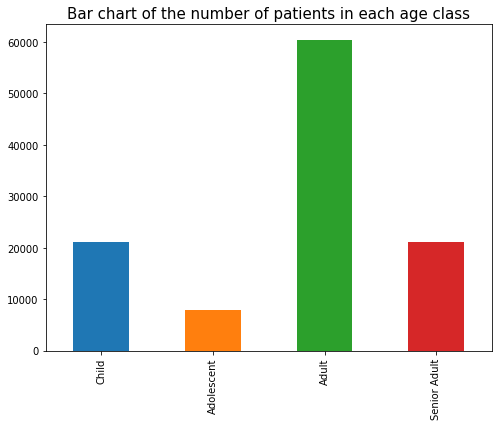

In [419]:
plt.figure(figsize=[8,6])
df['age_class'].value_counts().sort_index().plot.bar();
plt.title('Bar chart of the number of patients in each age class', fontdict={'fontsize':15});

<p style="font-size:16px">We notice that the <b>Adult</b> class has the highest count out of the 4 classes, which makes sense, since that it has the largest range (<b>19-59</b>).</p>

<p style="font-size:16px">Finally, we will look at the percentage of patients showing up for the Appointments in each age class.</p>

In [420]:
classes = df.groupby(['age_class', 'shown_up']).count()['gender']
classes

age_class     shown_up
Child         0            4301
              1           16712
Adolescent    0            2038
              1            5767
Adult         0           12712
              1           47692
Senior Adult  0            3222
              1           17878
Name: gender, dtype: int64

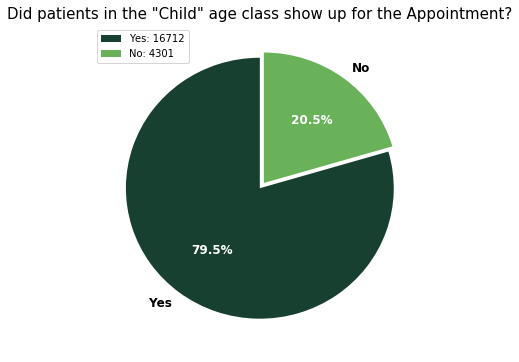

In [421]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(classes['Child'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#184030','#69b259'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 16712', 'No: 4301']);
plt.title('Did patients in the "Child" age class show up for the Appointment?', fontdict={'fontsize':15});

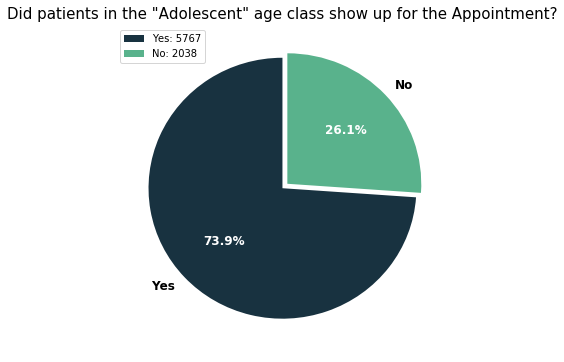

In [422]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(classes['Adolescent'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 5767', 'No: 2038']);
plt.title('Did patients in the "Adolescent" age class show up for the Appointment?', fontdict={'fontsize':15});

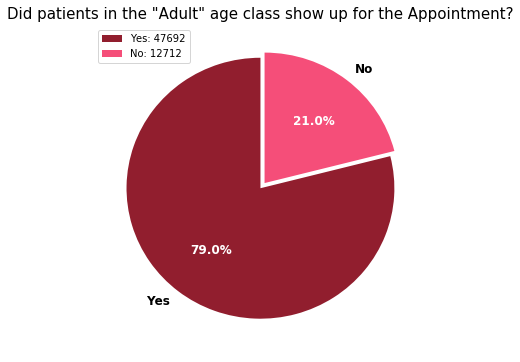

In [423]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(classes['Adult'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 47692', 'No: 12712']);
plt.title('Did patients in the "Adult" age class show up for the Appointment?', fontdict={'fontsize':15});

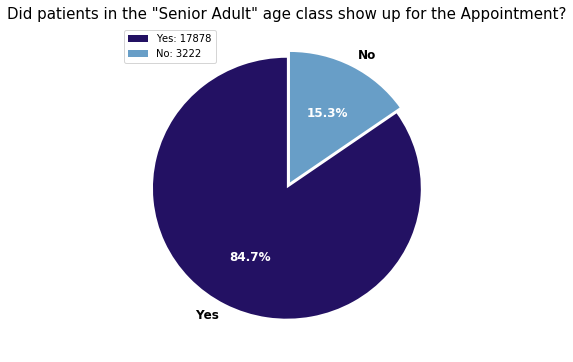

In [424]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(classes['Senior Adult'][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#231163', '#689ec7'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 17878', 'No: 3222']);
plt.title('Did patients in the "Senior Adult" age class show up for the Appointment?', fontdict={'fontsize':15});

<p style="font-size:16px">By listing each age class showing up percentage in a descending order, we will find out that Senior Adults (<b>60 Years old and higher patients</b>) has the highest Percentage of showing up for the Appointments.</p>

<ol style="font-size:17px">
    <li>Senior Adult (60 years and above): <b>84.7%</b></li>
    <li>Child (0-12 years): <b>79.5%</b></li>
    <li>Adult (19-59 years): <b>79.0%</b></li>
    <li>Adolescent (13-18 years): <b>73.9%</b></li>
</ol>

<p style="font-size:18px">From the plots and the List above, we found out that younger patients (Child and Adolescent classes) have an average percentage of <b>76.7%</b> and older patients (Adult and Adolescent classes) have an average percentage of <b>81.85%</b>, hence older patients show up more than their younger Counterparts.</p>
<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">We conclude that the answer to the Question is: <b>No</b>, Younger patients <b>do not</b> show up more than their older Counterparts.</p>

### What is the Day of the Week with the highest percentage of patients showing up?

<p style="font-size:16px">Let's investigate the most common Day of the Week for appointments</p> 
<p style="font-size:16px">Knowing that this Dataset contains appointments made by patients in Brazil, we should expect to see very few appointments, or none at all, on weekend days there (<b>Saturday</b> and <b>Sunday</b>).</p>

In [425]:
df['day_of_week'] = pd.to_datetime(df['appointment_day']).dt.day_name()
df['day_of_week'].value_counts()

Wednesday    25823
Tuesday      25582
Monday       22677
Friday       18985
Thursday     17216
Saturday        39
Name: day_of_week, dtype: int64

<p style="font-size:16px">As we expected, there are no appointments at all on <b>Sunday</b> and a negligible number of appointments on <b>Saturday</b>.</p>

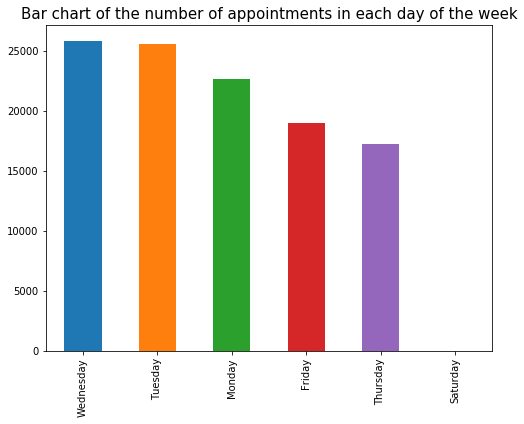

In [426]:
plt.figure(figsize=[8,6])
df['day_of_week'].value_counts().plot.bar();
plt.title('Bar chart of the number of appointments in each day of the week', fontdict={'fontsize':15});

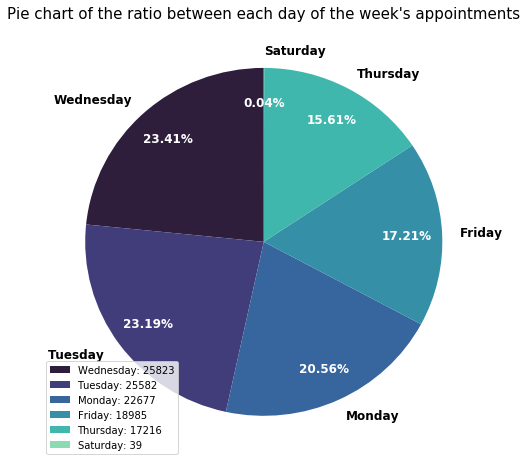

In [427]:
plt.figure(figsize=[8,8])
_, _, at = plt.pie(df['day_of_week'].value_counts(), autopct='%.2f%%', pctdistance=0.8, colors=sns.color_palette("mako"), startangle=90, labels=df['day_of_week'].value_counts().index, textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Wednesday: 25823','Tuesday: 25582','Monday: 22677','Friday: 18985','Thursday: 17216','Saturday: 39'], loc=3, frameon=True, fancybox=True);
plt.title("Pie chart of the ratio between each day of the week's appointments", fontdict={'fontsize':15});

<p style="font-size:16px">By Investigating the two Plots shown above, we will find out that the day with the most appointments made on is <b>Wednesday</b> followed closely by <b>Tuesday</b>, and the Day with the least number of appointments made on, ignoring saturday, is <b>Thursday</b>.</p>

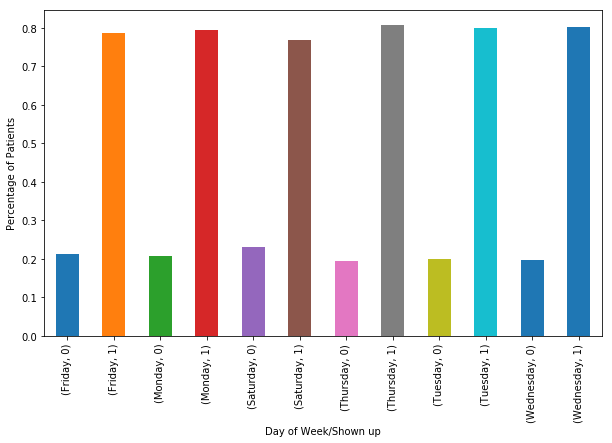

In [428]:
i = -1
plt.figure(figsize=[10,6])
def perc(x):
    global i
    days = df['day_of_week'].value_counts().sort_index().index
    i += 1
    return x/(df['day_of_week'].value_counts()[days[i//2]])
    
dow_perc = (df.groupby(['day_of_week', 'shown_up']).count()['gender']).apply(perc)
dow_perc.plot(kind='bar').set(ylabel='Percentage of Patients', xlabel='Day of Week/Shown up');

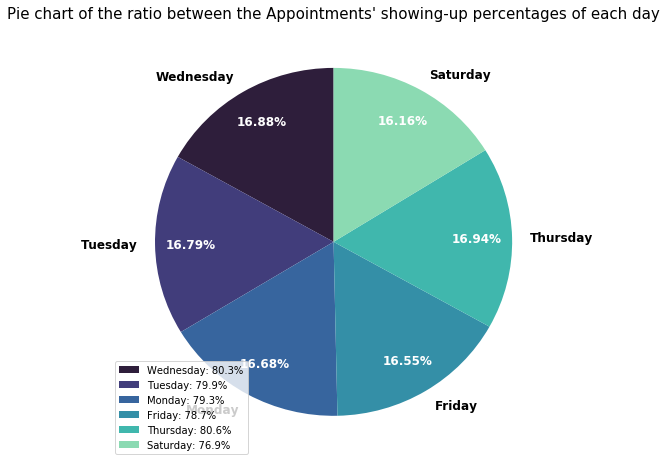

In [429]:
plt.figure(figsize=[8,8])
_, _, at = plt.pie(df.query('shown_up==1')['day_of_week'].value_counts()/df['day_of_week'].value_counts(), colors=sns.color_palette("mako"), autopct='%.2f%%', pctdistance=0.8, startangle=90, labels=df['day_of_week'].value_counts().index, textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Wednesday: 80.3%','Tuesday: 79.9%','Monday: 79.3%','Friday: 78.7%','Thursday: 80.6%','Saturday: 76.9%'], loc=3, frameon=True, fancybox=True);
plt.title("Pie chart of the ratio between the Appointments' showing-up percentages of each day", fontdict={'fontsize':15});

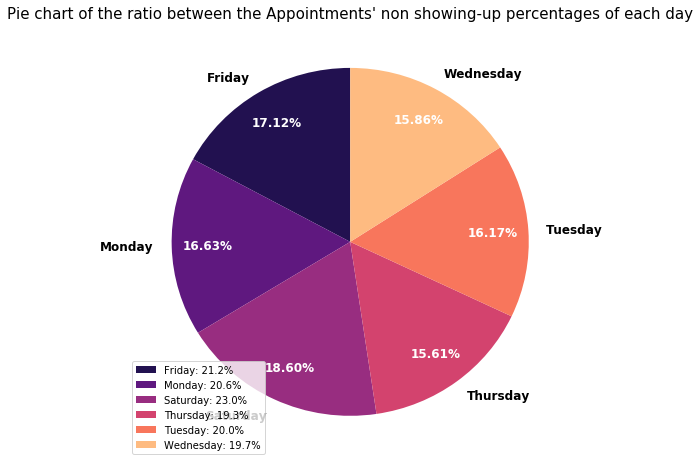

In [430]:
plt.figure(figsize=[8,8])
_, _, at = plt.pie(df.query('shown_up==0')['day_of_week'].value_counts().sort_index()/df['day_of_week'].value_counts().sort_index(), autopct='%.2f%%', pctdistance=0.8, startangle=90, colors=sns.color_palette("magma"), labels=df['day_of_week'].value_counts().sort_index().index, textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Friday: 21.2%','Monday: 20.6%','Saturday: 23.0%','Thursday: 19.3%','Tuesday: 20.0%','Wednesday: 19.7%'], loc=3, frameon=True, fancybox=True);
plt.title("Pie chart of the ratio between the Appointments' non showing-up percentages of each day", fontdict={'fontsize':15});

<p style="font-size:16px">From the plots above, we can form two lists describing the show up and non show up percentages of each day as such:</p>

<div style="width: 100%; display: table;">
    <div style="display: table-row">
        <div style="width: 600px; display: table-cell;">
            <h4>Show up Percentage in each day of the Week</h4>
            <ol style="font-size:17px">
                <li>Wednesday: <b>80.3%</b></li>
                <li>Tuesday: <b>79.9%</b></li>
                <li>Monday: <b>79.4%</b></li>
                <li>Friday: <b>78.8%</b></li>
                <li>Thursday: <b>80.6%</b></li>
                <li>Saturday: <b>76.9%</b></li>
            </ol>
        </div>
        <div style="display: table cell;">
            <h4>Absence Percentage in each day of the Week</h4>
            <ol style="font-size:17px">
                <li>Friday: <b>21.2%</b></li>
                <li>Monday: <b>20.6%</b></li>
                <li>Saturday: <b>23.1%</b></li>
                <li>Thursday: <b>19.4%</b></li>
                <li>Tuesday: <b>20.1%</b></li>
                <li>Wednesday: <b>19.7%</b></li>
            </ol>
        </div>
    </div>
</div>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the two lists above, we conclude that the Day with the highest show up Percentage is <b>Wednesday</b>, on the other hand, the Day with the highest absence Percentage is <b>Friday</b>.</p>

### If the Patient is a reciepent of the Scholarship Program, Does that mean they will show up for the Appointment more than the others?

<p style="font-size:16px">The Bolsa Família is a social welfare program that provides financial aid to poor Brazilian families, that means the Recipients of this program in this dataset come from poor families.</p> 
<p style="font-size:16px">Let's take a look at the Percentage of the Patients who are recipients of the scholarship Program.</p>

In [431]:
df['scholarship'].value_counts()

0    99479
1    10843
Name: scholarship, dtype: int64

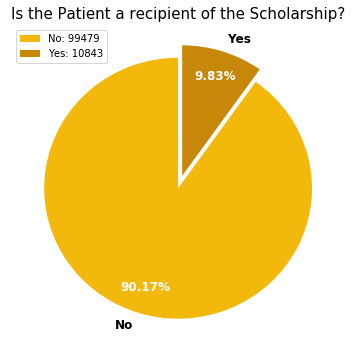

In [432]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie((df['scholarship'].value_counts()), colors=['#F2B90C','#C7880A'], autopct='%.2f%%', explode=[0,0.1], pctdistance=0.8, startangle=90, labels=['No', 'Yes'], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['No: 99479', 'Yes: 10843']);
plt.title('Is the Patient a recipient of the Scholarship?', fontdict={'fontsize':15});

<p style="font-size:16px">The Patients who are recipients of the Scholarship form a small percentage of the whole Sample.</p>

<p style="font-size:16px">Let's take a look at appointments' showing up and absence statistics.</p>

In [433]:
df.groupby(['scholarship','shown_up']).count()['gender']

scholarship  shown_up
0            0           19696
             1           79783
1            0            2577
             1            8266
Name: gender, dtype: int64

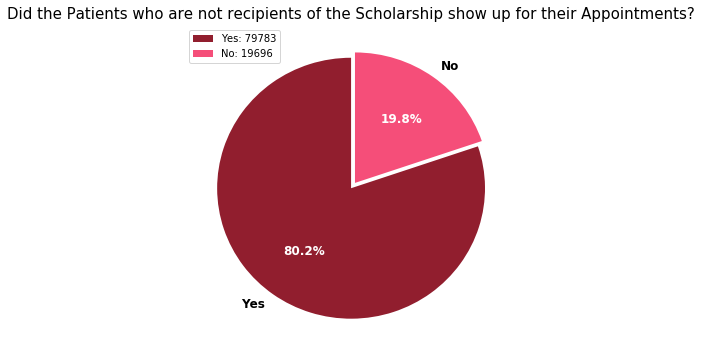

In [434]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['scholarship','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 79783', 'No: 19696']);
plt.title("Did the Patients who are not recipients of the Scholarship show up for their Appointments?", fontdict={'fontsize':15});

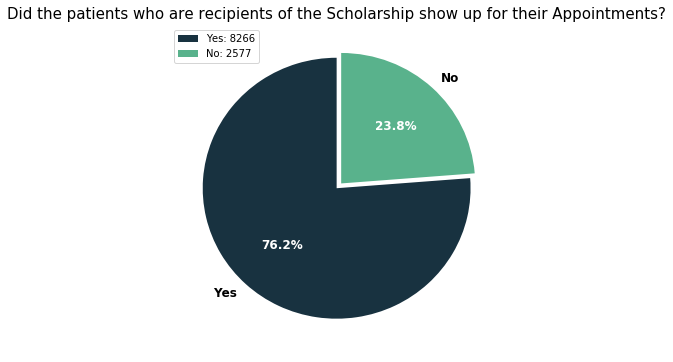

In [435]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['scholarship','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 8266', 'No: 2577']);
plt.title("Did the patients who are recipients of the Scholarship show up for their Appointments?", fontdict={'fontsize':15});

<p style="font-size:16px">We notice the showing up Percentage of the Patients who are recipients of the Scholarship is less than the Perecentage of those who are not.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, being a recipients of the Scholarship <b>does not</b> mean patients will show up more for their Appointments, in fact, recipients show up less than others.<br><i><b>Remember</b>: There is a negative correlation coefficient between the <b>shown_up</b> and <b>scholarship</b> variables.</i></p>

### Does receiving an SMS mean the Patient will show up for the Appointment?

<p style="font-size:16px">It may seem obvious that receiving an SMS to remind the Patient of the Appointment means the Patients will certainly show up, but the negative correlation coefficient we say above says otherwise, let's investigate whether this is true or false.</p>
<p style="font-size:16px">Let's take a look at the Percentage of the Patients who have received an SMS.</p>

In [436]:
df['sms_received'].value_counts()

0    74887
1    35435
Name: sms_received, dtype: int64

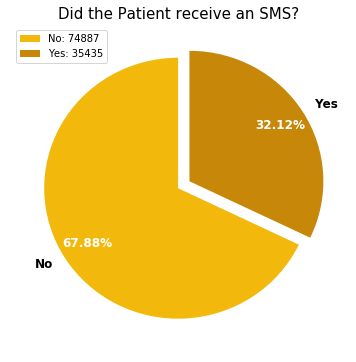

In [437]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie((df['sms_received'].value_counts()), colors=['#F2B90C','#C7880A'], autopct='%.2f%%', explode=[0,0.1], pctdistance=0.8, startangle=90, labels=['No', 'Yes'], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['No: 74887', 'Yes: 35435']);
plt.title('Did the Patient receive an SMS?', fontdict={'fontsize':15});

<p style="font-size:16px">Patients who didn't received an SMS are more than twice as large as the Patients who did.</p>

<p style="font-size:16px">Let's take a look at appointments' showing up and absence statistics.</p>

In [438]:
df.groupby(['sms_received','shown_up']).count()['gender']

sms_received  shown_up
0             0           12498
              1           62389
1             0            9775
              1           25660
Name: gender, dtype: int64

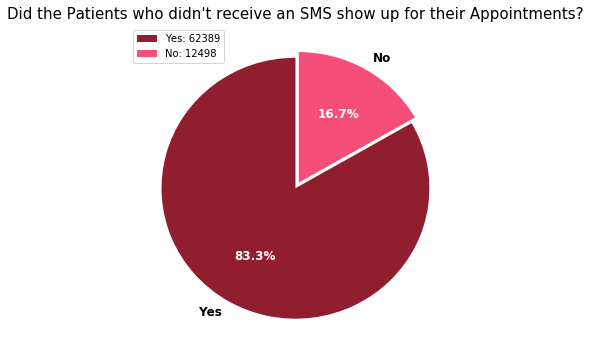

In [439]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['sms_received','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 62389', 'No: 12498']);
plt.title("Did the Patients who didn't receive an SMS show up for their Appointments?", fontdict={'fontsize':15});

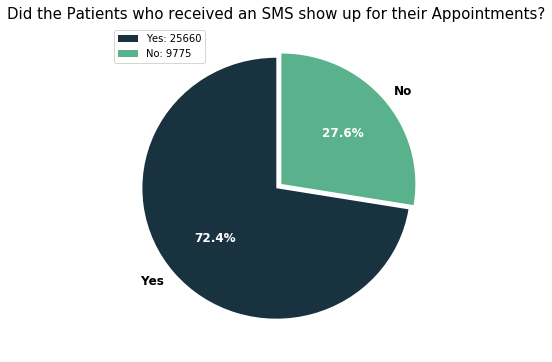

In [440]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['sms_received','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 25660', 'No: 9775']);
plt.title("Did the Patients who received an SMS show up for their Appointments?", fontdict={'fontsize':15});

<p style="font-size:16px">We notice the showing up Percentage of the Patients who have received an SMS is less than the Perecentage of those who did.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, Receiving an SMS <b>does not</b> mean patients will show up more for their Appointments, in fact it is quite the opposite.<br><i><b>Remember</b>: There is a relatively large negative correlation coefficient between the <b>shown_up</b> and <b>sms_received</b> variables.</i></p>

### Do patients with Diabetes and/or Hypertension show up less for their Appointments?

<p style="font-size:16px">Diabetes and Hypertension are two types of chronic diseases that affects patients' lifes, here we will investigate if any one of them or both of them affect the show up of the patients for their Appointments.

In [441]:
df.groupby(['diabetes','hypertension']).count()['gender']

diabetes  hypertension
0         0               87150
          1               15272
1         0                1456
          1                6444
Name: gender, dtype: int64

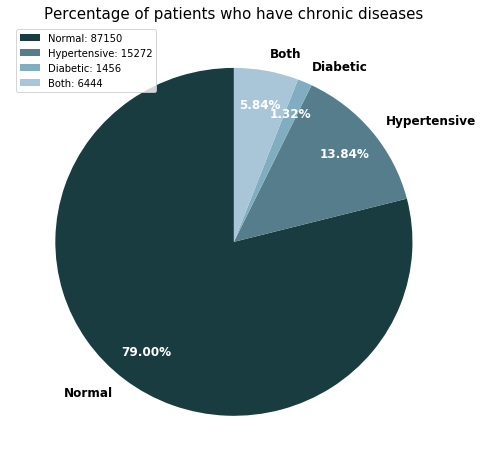

In [442]:
plt.figure(figsize=[8,8])
_, _, at = plt.pie(df.groupby(['diabetes','hypertension']).count()['gender'], autopct='%.2f%%', pctdistance=0.8, colors=['#193C40', '#567D8C', '#80ADBF', '#A9C6D9'], startangle=90, labels=['Normal', 'Hypertensive', 'Diabetic', 'Both'], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Normal: 87150','Hypertensive: 15272','Diabetic: 1456','Both: 6444'], loc=2, frameon=True, fancybox=True);
plt.title("Percentage of patients who have chronic diseases", fontdict={'fontsize':15});

<p style="font-size:16px">Here we can see that the Percentages of patients who have both Hypertension and Diabetes is higher than those who have Diabetes only, This is because there is a relatively large correlation coefficient between the <b>diabetes</b> and <b>hypertension</b> variables.</p> 

<p style="font-size:16px">Let's take a look at appointments' showing up and absence statistics for each chronic diseases.</p>

<p style="font-size:18px"><b>Hypertension</b></p>

In [443]:
df.groupby(['hypertension','shown_up']).count()['gender']

hypertension  shown_up
0             0           18525
              1           70081
1             0            3748
              1           17968
Name: gender, dtype: int64

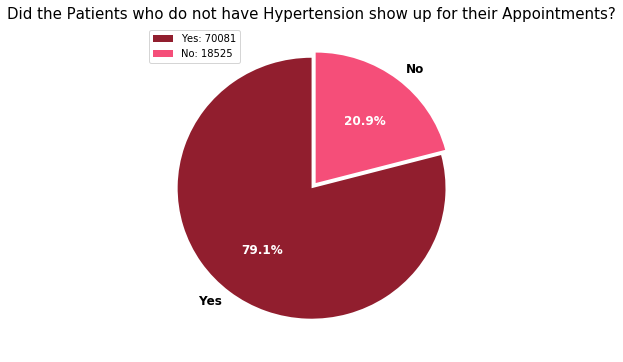

In [444]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['hypertension','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 70081', 'No: 18525']);
plt.title('Did the Patients who do not have Hypertension show up for their Appointments?', fontdict={'fontsize':15});

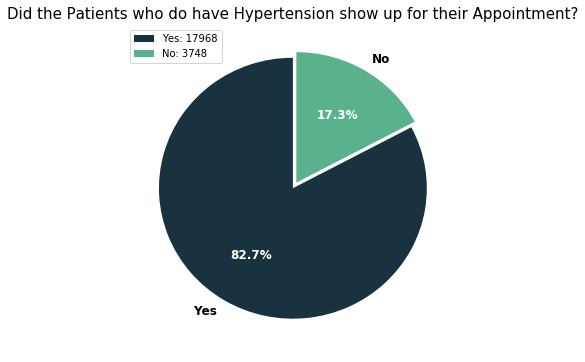

In [445]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['hypertension','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 17968', 'No: 3748']);
plt.title('Did the Patients who do have Hypertension show up for their Appointment?', fontdict={'fontsize':15});

<p style="font-size:16px">We notice that the show up Percentages for the Patients who are hypertensive are higher than the others.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, Hypertensive patients show up <b>more</b> for the Appointments than those who are not.<br><i><b>Remember</b>: There is a positive correlation coefficient between the <b>shown_up</b> and <b>hypertension</b> variables.</i></p>

<p style="font-size:18px"><b>Diabetes</b></p>

In [446]:
df.groupby(['diabetes','shown_up']).count()['gender']

diabetes  shown_up
0         0           20851
          1           81571
1         0            1422
          1            6478
Name: gender, dtype: int64

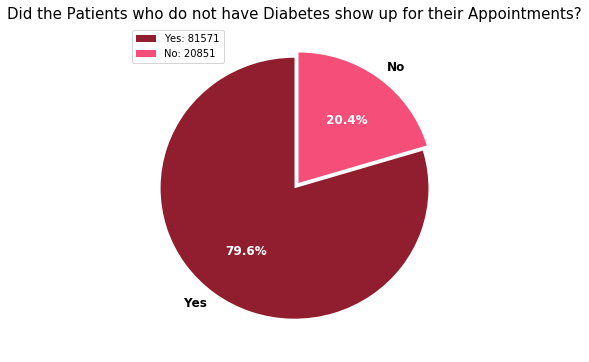

In [447]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['diabetes','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 81571', 'No: 20851']);
plt.title('Did the Patients who do not have Diabetes show up for their Appointments?', fontdict={'fontsize':15});

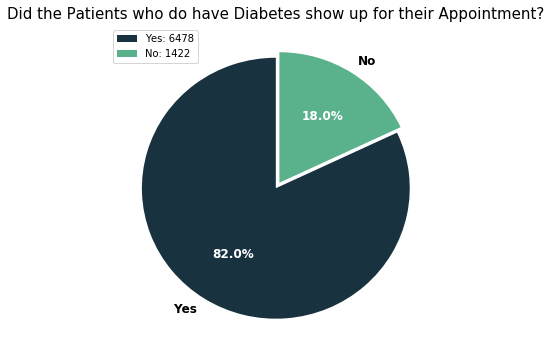

In [448]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['diabetes','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 6478', 'No: 1422']);
plt.title('Did the Patients who do have Diabetes show up for their Appointment?', fontdict={'fontsize':15});

<p style="font-size:16px">We notice that the show up Percentages for the Patients who are diabetic are higher than the others.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, Diabetic patients show up <b>more</b> for the Appointments than those who are not.<br><i><b>Remember</b>: There is a positive correlation coefficient between the <b>shown_up</b> and <b>diabetes</b> variables.</i></p>

<p style="font-size:18px"><b>Hypertension and Diabetes</b></p>

In [449]:
df.groupby(['hypertension','diabetes', 'shown_up']).count()['gender']

hypertension  diabetes  shown_up
0             0         0           18236
                        1           68914
              1         0             289
                        1            1167
1             0         0            2615
                        1           12657
              1         0            1133
                        1            5311
Name: gender, dtype: int64

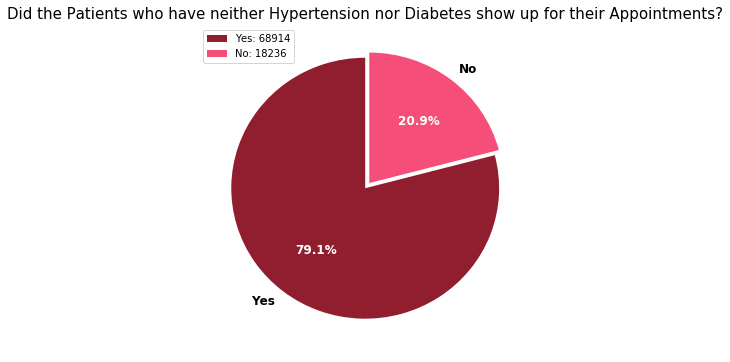

In [450]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.query('hypertension==0').groupby(['diabetes','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 68914', 'No: 18236']);
plt.title('Did the Patients who have neither Hypertension nor Diabetes show up for their Appointments?', fontdict={'fontsize':15});

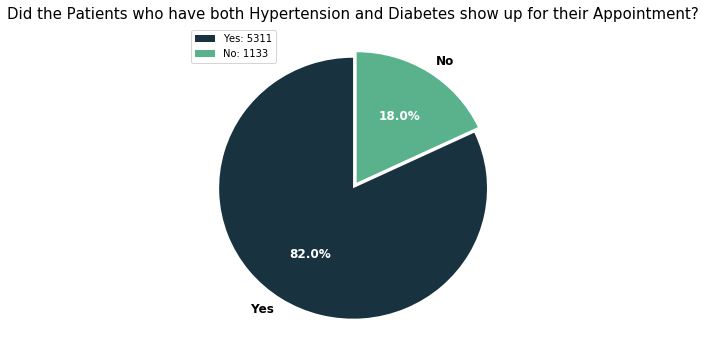

In [451]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['diabetes','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 5311', 'No: 1133']);
plt.title('Did the Patients who have both Hypertension and Diabetes show up for their Appointment?', fontdict={'fontsize':15});

<p style="font-size:16px">We notice that the show up Percentages for the Patients who are both hypertensive and diabetic are higher than the others.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, patients with chronic diseases show up <b>more</b> for the Appointments than those who are not.<br><i><b>Remember</b>: There is positive correlation coefficients between the <b>shown_up</b> and both <b>hypertension</b> and <b>diabetes</b> variables.</i></p>

### Does Alcoholism affect showing up for Appointments or not?

<p style="font-size:16px">Let's investigate whether being alcohol dependent has an effect on the Patients' showing up for their Appointments or not.</p>
<p style="font-size:16px">Let's take a look at the Percentage of the Patients who have stated they are alcoholic or alcohol dependent.</p>

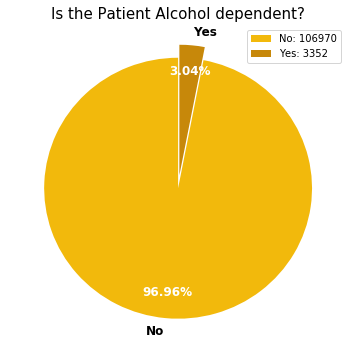

In [452]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie((df['alcoholism'].value_counts()), colors=['#F2B90C','#C7880A'], autopct='%.2f%%', explode=[0,0.1], pctdistance=0.8, startangle=90, labels=['No', 'Yes'], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['No: 106970', 'Yes: 3352']);
plt.title('Is the Patient Alcohol dependent?', fontdict={'fontsize':15});

<p style="font-size:16px">Looking at the Pie Chart above, we notice that the Percentage of alcohol dependent patients is relatively small.</p>

<p style="font-size:16px">Let's take a look at appointments' showing up and absence statistics.</p>

In [453]:
df.groupby(['alcoholism','shown_up']).count()['gender']

alcoholism  shown_up
0           0           21598
            1           85372
1           0             675
            1            2677
Name: gender, dtype: int64

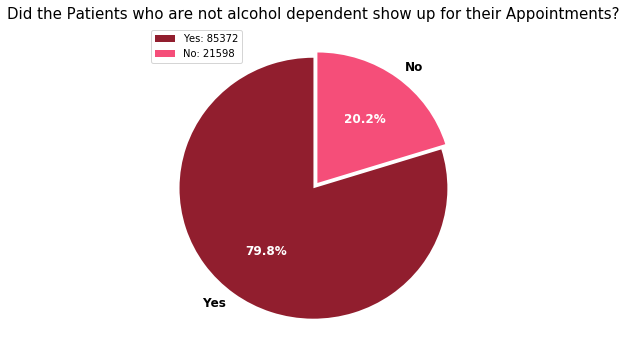

In [454]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['alcoholism','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 85372', 'No: 21598']);
plt.title('Did the Patients who are not alcohol dependent show up for their Appointments?', fontdict={'fontsize':15});

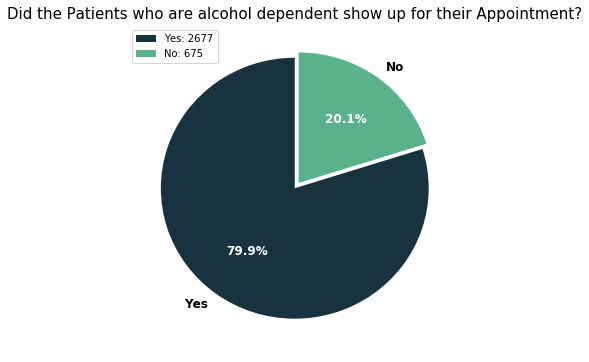

In [455]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['alcoholism','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 2677', 'No: 675']);
plt.title('Did the Patients who are alcohol dependent show up for their Appointment?', fontdict={'fontsize':15});

<p style="font-size:16px">We notice that both the show up Percentages are the same for patients who are alcohol dependent and who are not.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, Alcoholism <b>does not</b> affect the probabilitiy of the Patients showing up for the Appointments.<br><i><b>Remember</b>: There is a negligible positive correlation coefficient between the <b>shown_up</b> and <b>alcoholism</b> variables.</i></p>

### Do handicapped Patients show up less for their Appointments?

<p style="font-size:16px">The Dataset came with a, presumably, binary variable indicating whether the Patient is handicapped or not, but there were entries with values over one, I had the option to saturate them (change them to ones), but I prefered removing them because the author's Description of the Dataset clearly stated that it is a binary value.</p>
<p style="font-size:16px">With this out of the way, let's look at the percentage of patients with a handicap in the whole Sample.</p>


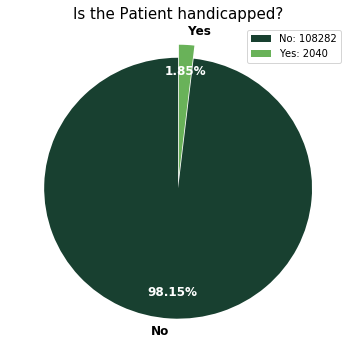

In [456]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie((df['handicap'].value_counts()), colors=['#184030','#69b259'], autopct='%.2f%%', explode=[0,0.1], pctdistance=0.8, startangle=90, labels=['No', 'Yes'], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['No: 108282', 'Yes: 2040']);
plt.title('Is the Patient handicapped?', fontdict={'fontsize':15});

<p style="font-size:16px">A very small percentage, <b>1.85%</b>, of the Patients are handicapped, so we need to take that into consideration.</p>

<p style="font-size:16px">Let's take a look at appointments' showing up and absence statistics.</p>

In [457]:
df.groupby(['handicap','shown_up']).count()['gender']

handicap  shown_up
0         0           21909
          1           86373
1         0             364
          1            1676
Name: gender, dtype: int64

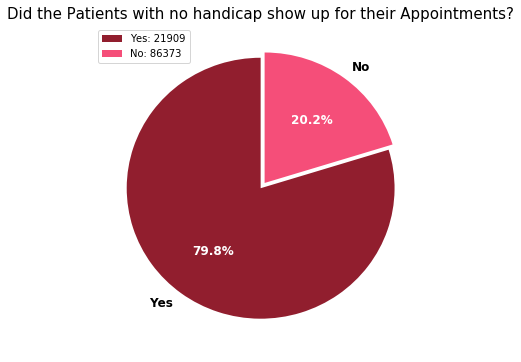

In [458]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['handicap','shown_up']).count()['gender'][0][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#911e2e', '#f54e79'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 21909', 'No: 86373']);
plt.title('Did the Patients with no handicap show up for their Appointments?', fontdict={'fontsize':15});

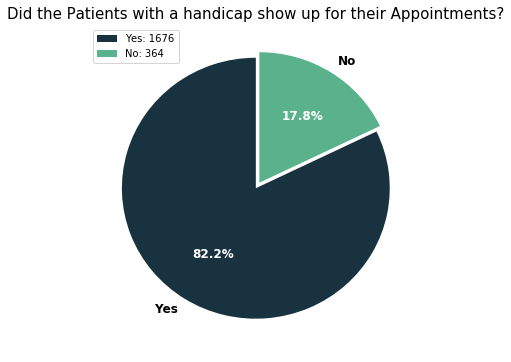

In [459]:
plt.figure(figsize=[6,6])
_, _, at = plt.pie(df.groupby(['handicap','shown_up']).count()['gender'][1][::-1], labels=['Yes', 'No'], autopct='%.1f%%', colors=['#183240', '#59b28c'], startangle=90, explode=[0,0.05], textprops={'fontsize':12,'color':'black', 'weight':'bold'});
for t in at:
    t.set_color('white')
plt.legend(labels=['Yes: 1676', 'No: 364']);
plt.title('Did the Patients with a handicap show up for their Appointments?', fontdict={'fontsize':15});they

<p style="font-size:16px">We notice that the percentage of patients who have shown up for their Appointments is higher for handicapped patients.</p>

<p style="border:1px; border-style:solid; padding: 0.5em; font-size:18px">From the plots above, we conclude that <b>No</b>, handicapped Patients show up <b>more</b> than the nonhandicapped Patients.<br><i><b>Remember</b>: There is a positive correlation coefficient between the <b>shown_up</b> and <b>handicap</b> variables.</i></p>

<a id='conclusions'></a>
## Conclusions
<ul style="font-size:15px">
    <li>Being a male or female is not a factor to determine whether the Patient will show up for the Appointment or not</li>
    <li>Older patients actually show up more than their younger counterparts.</li>
    <li>The Patient will have a high probability of showing up for the Appointment if it was on Wednesday, on the other hand, they will have a high probability of not showing up if it was on Friday.</li>
    <li>Patients who are recipients of the Bolsa Familia Program have a lower probability of showing up for their Appointments.</li>
    <li>Patients who have received an SMS reminding them of their Appointments, surprisingly, showed up less than the ones who didn't receive an SMS.</li>
    <li>Patients who have Hypertension and/or diabetes, show up more for their Appointments than those who do not have any of them.</li>
    <li>Patients who are Hypertensive are most probably diabetic too.</li>
    <li>Patients with a disability have a high probability of showing up for their Appointments.</li>
</ul>

### Limitations
<ul style="font-size:15px">
    <li>the data in the <b>AppointmentDay</b> has no time component (every entry is at 00:00:00), while scheduling_day does have a time component, so measuring the waiting time between scheduling and the Appointment day will result in negative time values.</li>
    <li>the <b>handicap</b> Variable is clearly stated that it can only have true or false values, or binary values, yet there are integer values up to 4; at first I thought the <b>handicap</b> and <b>sms_received</b> Columns were flipped because the integer values may have meant how many SMS messages had been sent to the Patient, if that was true, then 32% of patients were handicapped, which doesn't make any sense, So I assumed that any value higher than one in the <b>handicap</b> Column is erroneous and should be removed.</li>
    <li>the <b>age</b> Column has a below zero value and values that are very old, over 100 years, but that should not be considered as limitation.</li>
    <li>Since most of our data are categorical, we cannot show strong correlation values between the variables.</li>
</ul>

In [461]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0